<a href="https://colab.research.google.com/github/Gaurav-phatkare/BERT_Model-NLP/blob/main/Twitter_Sentiment_Analysis_Using_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install kaggle

In [3]:
!mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d kazanova/sentiment140

100% 80.9M/80.9M [00:02<00:00, 39.9MB/s]
100% 80.9M/80.9M [00:02<00:00, 30.0MB/s]


In [7]:
!unzip /content/sentiment140.zip

Archive:  /content/sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [8]:
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='latin-1', header = None)

In [9]:
df.columns=['Sentiment', 'id', 'Date', 'Query', 'User', 'Tweet']

In [10]:
df = df.drop(columns=['id', 'Date', 'Query', 'User'], axis=1)

In [11]:
df.head()

,Sentiment,Tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


##Data Cleaning

In [12]:
# df = df.rename(columns={df.columns[0]: 'target', df.columns[1]: 'id', df.columns[2]: 'date', df.columns[3]: 'query', df.columns[4]: 'username', df.columns[5]: 'content'})

In [13]:
df.shape

(1600000, 2)

In [14]:
# df = df.sample(250000)

In [15]:
df['labels'] = df['Sentiment'].replace([0, 4],['Negative','Positive'])

In [16]:
df.Sentiment.value_counts()

0    800000
4    800000
Name: Sentiment, dtype: int64

In [17]:
df['Sentiment'] = df.Sentiment.replace(4,1)

In [18]:
df.Sentiment.value_counts()

0    800000
1    800000
Name: Sentiment, dtype: int64

In [19]:
import re

hashtags = re.compile(r"^#\S+|\s#\S+")
mentions = re.compile(r"^@\S+|\s@\S+")
urls = re.compile(r"https?://\S+")

def process_text(text):
    text = re.sub(r'http\S+', '', text)
    text = hashtags.sub(' hashtag', text)
    # text = mentions.sub(' entity', text)
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    return text.strip().lower()

In [20]:
df['Tweet'] = df.Tweet.apply(process_text)

In [21]:
df['Tweet'].head()

0    - awww, that's a bummer.  you shoulda got davi...
1    is upset that he can't update his facebook by ...
2    i dived many times for the ball. managed to sa...
3       my whole body feels itchy and like its on fire
4    no, it's not behaving at all. i'm mad. why am ...
Name: Tweet, dtype: object

In [22]:
df.drop_duplicates(subset='Tweet',inplace=True)

In [23]:
df.shape

(1541247, 3)

In [24]:
text_len = []
for text in df.Tweet:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [25]:
df['text_len'] = text_len

In [26]:
df.head()

,Sentiment,Tweet,labels,text_len
0,0,"- awww, that's a bummer. you shoulda got davi...",Negative,17
1,0,is upset that he can't update his facebook by ...,Negative,21
2,0,i dived many times for the ball. managed to sa...,Negative,17
3,0,my whole body feels itchy and like its on fire,Negative,10
4,0,"no, it's not behaving at all. i'm mad. why am ...",Negative,20


In [27]:
df = df[df['text_len'] >= 3]

In [28]:
df.shape

(1512538, 4)

In [29]:
import tensorflow as tf
!pip install transformers

from transformers import BertTokenizerFast
from transformers import TFBertModel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.0 MB/s eta 0:00:00


In [30]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [31]:
BERT_token_lens = []

for txt in df['Tweet'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    BERT_token_lens.append(len(tokens))
max_len=np.max(BERT_token_lens)

In [32]:
df['BERT_token_lens'] = BERT_token_lens

In [33]:
df = df.sort_values(by='BERT_token_lens', ascending=False)

In [34]:
df[:9000]

,Sentiment,Tweet,labels,text_len,BERT_token_lens
1582941,1,5 days till new top gear î?î?î?î?î?î?î?...,Positive,7,230
709142,0,à¶¶à¶½à·?à¶à·à¶± à·à¶»à· à¶ºà¶±à·à¶±à· à...,Negative,20,212
1188208,1,à¤à¤¾à¤¨ à¤à¤¤à¤¾ à¥¨ à¤¦à¤¿à¤µà¤¸ à¤¸à¥?à¤...,Positive,25,175
443960,0,firefly ñ?ñð¾ ðºð°ðºð°ñ?-ñð¾ ñ?ð¾ð²ðµññðµð...,Negative,19,173
1324105,1,ð?ðµ ð¼ð¾ð³ñ ñ?ðºð°ð·ð°ññ ð¾ ñð¾ð¿-ð¼ðµð½ð...,Positive,21,172
...,...,...,...,...,...
1147631,1,hahahahahaha i watched the video yesterday!!!!...,Positive,18,47
788983,0,in soooo much pain....my feet hurt a lot for s...,Negative,24,47
1356903,1,people always say &quot;lifes too short&quot; ...,Positive,28,47
1324206,1,up and at the day....pep day for my son...swim...,Positive,23,47


In [35]:
df = df[10000:]

In [36]:
df = df.sample(frac=1).reset_index(drop=True)

In [37]:
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

In [38]:
tokenizer_RObert = RobertaTokenizerFast.from_pretrained("roberta-base")

In [39]:
Robert_token_lens= []

for txt in df['Tweet'].values:
    tokens = tokenizer_RObert.encode(txt, max_length=512, truncation=True)
    Robert_token_lens.append(len(tokens))
max_len=np.max(Robert_token_lens)

In [40]:
df['Robert_token_lens'] = Robert_token_lens

In [41]:
df = df.sort_values(by='Robert_token_lens', ascending=False)

In [42]:
df.head()

,Sentiment,Tweet,labels,text_len,BERT_token_lens,Robert_token_lens
197815,1,à¹à¸à¸µà¹à¸¢à¸§à¹à¸­à¸²à¸£à¸²à¸à¸²à¹à¸à...,Positive,7,29,467
1004988,1,à¸­à¹à¸­ à¹à¸à¸¢à¸à¸²à¸¡à¹à¹à¸à¸à¸µà¹...,Positive,14,43,464
486861,1,â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥omggg! 9 days...,Positive,12,42,414
1068497,1,à¸®à¸²à¹ ... à¹à¸¡à¸·à¹à¸­à¸?à¸µà¹à¹à¸à¸...,Positive,15,41,342
903002,1,à¸«à¸¥à¸±à¸à¸à¸´à¸à¸à¸±à¹à¸à¹?à¸¥à¹à¸§à...,Positive,8,38,328


In [43]:
df[10000:]

,Sentiment,Tweet,labels,text_len,BERT_token_lens,Robert_token_lens
1384883,1,ha! still worshiping ur lame team hahaha i'm s...,Positive,21,41,42
989008,0,wishes she was getting k-rudds money... but sh...,Negative,23,43,42
221942,0,bk hip hop festival sounds great . . . from ou...,Negative,26,39,42
1200312,0,update: the charade continues enabling the...,Negative,23,38,42
495197,0,just when i decide to leave twitter &amp; go t...,Negative,31,42,42
...,...,...,...,...,...,...
1348213,0,i hate working,Negative,3,5,5
596351,1,only my penis,Positive,3,5,5
498729,1,k i will,Positive,3,5,5
1142820,1,- more me,Positive,3,5,5


In [44]:
df = df[10000:]

In [45]:
df = df.sample(frac = 1).reset_index(drop = True)

In [46]:
df.tail()

,Sentiment,Tweet,labels,text_len,BERT_token_lens,Robert_token_lens
1492533,1,- you are too cute,Positive,5,7,7
1492534,0,non-monotonic shower controls,Negative,3,8,9
1492535,1,its fun getttting up 2 hours early to tan ... ...,Positive,16,30,29
1492536,1,looking at apartments in la and i just found a...,Positive,13,24,20
1492537,0,i didnt win the mega!! im sad!!!,Negative,7,15,18


In [47]:
df = df.sample(450000)

In [48]:
df.shape

(450000, 6)

In [49]:
df.head()

,Sentiment,Tweet,labels,text_len,BERT_token_lens,Robert_token_lens
574967,1,yes it has!! we are doing great 'n u? lookin'...,Positive,15,24,24
301336,1,i love hearing my niece say &quot;no daddy i w...,Positive,15,27,27
812148,1,checking if twitterific wrks on my phone,Positive,7,11,11
103088,0,"- please keep my roommate, dominic, in your pr...",Negative,17,25,25
55140,1,hope ya feel better real soon.,Positive,6,9,10


In [50]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)

In [51]:
training_data.shape, testing_data.shape

((360000, 6), (90000, 6))

In [52]:
# import tensorflow as tf
# !pip install transformers

In [53]:
# from transformers import BertTokenizerFast
# from transformers import TFBertModel

In [54]:
# tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [55]:
# token_lens = []

# for txt in training_data['Tweet'].values:
#     tokens = tokenizer.encode(txt, max_length=512, truncation=True)
#     token_lens.append(len(tokens))

# max_len=np.max(token_lens)

###Bert Max Token length

In [56]:
BERT_Max_Token = np.max(df['BERT_token_lens'])
BERT_Max_Token

46

###Robert Token Length

In [57]:
ROBERT_Max_Token = np.max(df['Robert_token_lens'])
ROBERT_Max_Token

42

In [58]:
# training_data['token_lens'] = token_lens

In [59]:
# training_df = training_data.sort_values(by='token_lens', ascending=False)

In [60]:
# training_df[:1000]

In [61]:
# training_df = training_df.iloc[1000:]

In [62]:
training_data.shape, testing_data.shape

((360000, 6), (90000, 6))

In [63]:
# training_df = training_df.sample(frac=1).reset_index(drop=True)

<ipython-input-64-5ff21bae5537>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(training_data['BERT_token_lens'])


<Axes: xlabel='BERT_token_lens', ylabel='Density'>

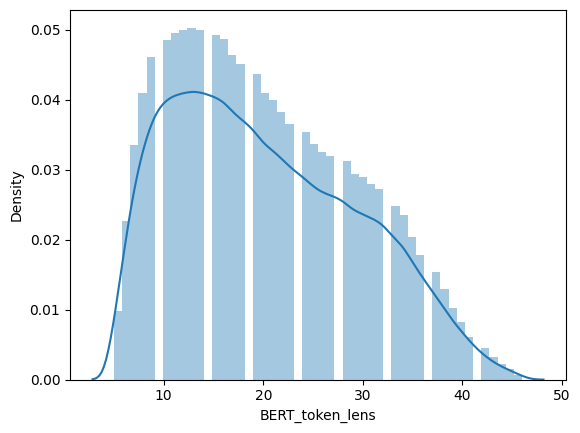

In [64]:
sns.distplot(training_data['BERT_token_lens'])

In [65]:
# token_lens_test = []

# for txt in testing_data['Tweet'].values:
#     tokens = tokenizer.encode(txt, max_length=512, truncation=True)
#     token_lens_test.append(len(tokens))

# max_len=np.max(token_lens_test)

In [66]:
# max_len

In [67]:
# testing_data['token_lens'] = token_lens_test

In [68]:
# testing_df = testing_data.sort_values(by='token_lens', ascending=False)
# testing_df.head(1000)

In [69]:
# testing_df = testing_df.iloc[1000:]
# testing_df.head(10)

In [70]:
# testing_df = testing_df.sample(frac=1).reset_index(drop=True)

In [71]:
# testing_df.head(10)

In [72]:
testing_data.Sentiment.value_counts()

0    45307
1    44693
Name: Sentiment, dtype: int64

In [73]:
training_data.Sentiment.value_counts()

0    182608
1    177392
Name: Sentiment, dtype: int64

In [74]:
X = training_data['Tweet'].values
y = training_data['Sentiment'].values

In [75]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [76]:
X_test = testing_data['Tweet'].values
y_test = testing_data['Sentiment'].values

In [77]:
X_train.shape[0], X_val.shape, X_test.shape

(288000, (72000,), (90000,))

# One Hot Encoding

In [78]:
y_train_le = y_train.copy()
y_valid_le = y_val.copy()
y_test_le = y_test.copy()

In [79]:
from sklearn import preprocessing

OneHot = preprocessing.OneHotEncoder()
y_train = OneHot.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_val = OneHot.fit_transform(np.array(y_val).reshape(-1, 1)).toarray()
y_test = OneHot.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

# Baseline Model With Naive Bayes and TFIDF

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


# Create tokenization and modelling pipeline

model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf',MultinomialNB())
])

# fit the pipeline to the training data

model_0.fit(X_train, y_train_le)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [81]:
# baseline_score = model_0.score(X_val, y_val)

In [82]:
# baseline_score

In [83]:
test_pred = model_0.predict(X_test)

In [84]:
y_test_le

array([1, 0, 0, ..., 1, 1, 1])

In [85]:
# make helper function for accuracy precision recall and f1 score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

print('\tClassification Report for Naive Bayes:\n\n',classification_report(y_test_le, test_pred, target_names = ['Negative', 'Positive']))




	Classification Report for Naive Bayes:

               precision    recall  f1-score   support

    Negative       0.75      0.80      0.77     45307
    Positive       0.78      0.72      0.75     44693

    accuracy                           0.76     90000
   macro avg       0.76      0.76      0.76     90000
weighted avg       0.76      0.76      0.76     90000



#BERT Sentiment Analysis

In [86]:
Max_Len = 60

In [87]:
def tokenize(data, max_len = Max_Len):
  input_ids = []
  attention_masks = []

  for i in range(len(data)):
    encoded = tokenizer.encode_plus(
    data[i],
    add_special_tokens = True,
    max_length = max_len,
    padding = 'max_length',
    return_attention_mask = True
    )

    input_ids.append(encoded['input_ids'])
    attention_masks.append(encoded['attention_mask'])

  return np.array(input_ids), np.array(attention_masks)

In [88]:
train_input_ids, train_attention_masks = tokenize(X_train, Max_Len)
val_input_ids, val_attention_masks = tokenize(X_val, Max_Len)
test_input_ids, test_attention_masks = tokenize(X_test, Max_Len)


In [89]:
len(train_input_ids)

288000

In [90]:
# # Reshape the input tensors to 2D
# train_input_ids = np.expand_dims(train_input_ids, axis=-1)
# train_attention_masks = np.expand_dims(train_attention_masks, axis=-1)
# val_input_ids = np.expand_dims(val_input_ids, axis=-1)
# val_attention_masks = np.expand_dims(val_attention_masks, axis=-1)
# test_input_ids = np.expand_dims(test_input_ids, axis=-1)
# test_attention_masks = np.expand_dims(test_attention_masks, axis=-1)

In [91]:
# train_input_ids.shape

In [92]:
# input_data = [train_input_ids,  train_attention_masks]

In [93]:
# type(y_train)

In [94]:
train_tf_data = tf.data.Dataset.from_tensor_slices((train_input_ids,  train_attention_masks))
train_tf_labels = tf.data.Dataset.from_tensor_slices(y_train)
train_tf_dataset = tf.data.Dataset.zip((train_tf_data, train_tf_labels))
train_tf_dataset = train_tf_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [95]:
val_tf_data = tf.data.Dataset.from_tensor_slices((val_input_ids,  val_attention_masks))
val_tf_labels = tf.data.Dataset.from_tensor_slices(y_val)
val_tf_dataset = tf.data.Dataset.zip((val_tf_data, val_tf_labels))
val_tf_dataset = val_tf_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [96]:
test_tf_data = tf.data.Dataset.from_tensor_slices((test_input_ids,  test_attention_masks))
test_tf_labels = tf.data.Dataset.from_tensor_slices(y_test)
test_tf_dataset = tf.data.Dataset.zip((test_tf_data, test_tf_labels))
test_tf_dataset = test_tf_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [97]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [98]:
Max_Len

60

In [99]:
# let build the model

input_ids = tf.keras.Input(shape = (Max_Len,), dtype = 'int32')
attention_masks = tf.keras.Input(shape = (Max_Len,), dtype = 'int32')

embeddings = bert_model([input_ids, attention_masks])[1]
# x = tf.keras.layers.Flatten()(embeddings)
output = tf.keras.layers.Dense(2, activation = 'softmax')(embeddings)

model = tf.keras.models.Model(inputs = [input_ids, attention_masks],
                              outputs = output)

In [100]:
# def create_model(bert_model, max_len = Max_len):
#   opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
#   loss = tf.keras.losses.CategoricalCrossentropy()
#   accuracy = tf.keras.metrics.CategoricalAccuracy()


#   input_ids = tf.keras.Input(shape = (Max_len,), dtype = 'int32')
#   attention_masks = tf.keras.Input(shape = (Max_len,), dtype = 'int32')

#   embeddings = bert_model([input_ids, attention_masks])[1]

#   output = tf.keras.layers.Dense(2, activation = 'softmax')(embeddings)

#   model = tf.keras.models.Model(inputs = [input_ids, attention_masks],
#                               outputs = output)

#   model.compile(opt, loss = loss, metrics = accuracy)

#   return model




In [101]:
# compile the model
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5),
              metrics=tf.keras.metrics.CategoricalAccuracy())

In [102]:
# model = create_model(bert_model, Max_len)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 60)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 60,                                            

In [ ]:
# history_bert_model = model.fit([train_input_ids,train_attention_masks], y_train,
#                                validation_data =([val_input_ids,val_attention_masks], y_val),
#                               #  steps_per_epoch = int(0.1 * len(train_tf_dataset)),
#                                epochs = 4,
#                                batch_size = 32)
#                               #  validation_steps = int(0.1 * len(val_tf_dataset)))

In [ ]:
# history_bert_model = model.fit(train_tf_dataset,
#                                validation_data =val_tf_dataset,
#                                steps_per_epoch = int(0.2 * len(train_tf_dataset)),
#                                epochs = 4,
#                                validation_steps = int(0.2 * len(val_tf_dataset)))

In [103]:
history_bert_model = model.fit(train_tf_dataset,
                               validation_data =val_tf_dataset,
                               steps_per_epoch = int(0.1 * len(train_tf_dataset)),
                               epochs = 6,
                               validation_steps = int(0.15 * len(val_tf_dataset)))

Epoch 1/6
900/900 [==============================] - 497s 490ms/step - loss: 0.4293 - categorical_accuracy: 0.8019 - val_loss: 0.3722 - val_categorical_accuracy: 0.8362
Epoch 2/6
900/900 [==============================] - 432s 480ms/step - loss: 0.3845 - categorical_accuracy: 0.8274 - val_loss: 0.3583 - val_categorical_accuracy: 0.8441
Epoch 3/6
900/900 [==============================] - 431s 479ms/step - loss: 0.3701 - categorical_accuracy: 0.8349 - val_loss: 0.3495 - val_categorical_accuracy: 0.8481
Epoch 4/6
900/900 [==============================] - 395s 439ms/step - loss: 0.3581 - categorical_accuracy: 0.8466 - val_loss: 0.3487 - val_categorical_accuracy: 0.8461
Epoch 5/6
900/900 [==============================] - 432s 480ms/step - loss: 0.3592 - categorical_accuracy: 0.8448 - val_loss: 0.3401 - val_categorical_accuracy: 0.8517
Epoch 6/6
900/900 [==============================] - 431s 479ms/step - loss: 0.3509 - categorical_accuracy: 0.8468 - val_loss: 0.3373 - val_categorical_acc

In [ ]:
history_bert_model = model.fit(train_tf_dataset,
                               validation_data =val_tf_dataset,
                               steps_per_epoch = int(0.1 * len(train_tf_dataset)),
                               epochs = 6,
                               validation_steps = int(0.15 * len(val_tf_dataset)))

Epoch 1/6
800/800 [==============================] - 404s 443ms/step - loss: 0.4362 - categorical_accuracy: 0.8003 - val_loss: 0.3833 - val_categorical_accuracy: 0.8303
Epoch 2/6
800/800 [==============================] - 339s 424ms/step - loss: 0.3843 - categorical_accuracy: 0.8304 - val_loss: 0.3735 - val_categorical_accuracy: 0.8327
Epoch 3/6
800/800 [==============================] - 338s 423ms/step - loss: 0.3744 - categorical_accuracy: 0.8337 - val_loss: 0.3554 - val_categorical_accuracy: 0.8410
Epoch 4/6
800/800 [==============================] - 340s 425ms/step - loss: 0.3650 - categorical_accuracy: 0.8380 - val_loss: 0.3482 - val_categorical_accuracy: 0.8478
Epoch 5/6
800/800 [==============================] - 338s 423ms/step - loss: 0.3585 - categorical_accuracy: 0.8427 - val_loss: 0.3703 - val_categorical_accuracy: 0.8384
Epoch 6/6
800/800 [==============================] - 340s 425ms/step - loss: 0.3508 - categorical_accuracy: 0.8466 - val_loss: 0.3482 - val_categorical_acc

In [104]:
test_tf_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 60), dtype=tf.int64, name=None), TensorSpec(shape=(None, 60), dtype=tf.int64, name=None)), TensorSpec(shape=(None, 2), dtype=tf.float64, name=None))>

In [105]:
test_pred_probs = model.predict(test_tf_dataset, verbose = 1)

2813/2813 [==============================] - 401s 141ms/step


In [106]:
test_pred_probs

array([[0.02515439, 0.97484565],
       [0.9830541 , 0.01694587],
       [0.5671888 , 0.43281117],
       ...,
       [0.05049983, 0.94950014],
       [0.01061626, 0.98938376],
       [0.20384264, 0.7961573 ]], dtype=float32)

In [107]:
test_pred = tf.argmax(test_pred_probs, axis = 1)
test_pred[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0])>

In [108]:
y_test_le[:10]

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0])

In [109]:
# make helper function for accuracy precision recall and f1 score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

print('\tClassification Report for Naive Bayes:\n\n',classification_report(y_test_le, test_pred, target_names = ['Negative', 'Positive']))




	Classification Report for Naive Bayes:

               precision    recall  f1-score   support

    Negative       0.86      0.84      0.85     45307
    Positive       0.84      0.86      0.85     44693

    accuracy                           0.85     90000
   macro avg       0.85      0.85      0.85     90000
weighted avg       0.85      0.85      0.85     90000



In [110]:
# model.predict(['I am not well'])

In [111]:
# sentance = 'This in Not fair!!'

In [ ]:
# sent_input_ids, sent_attention_masks = tokenize(sentance, Max_len)

In [ ]:
# sent_tf_data = tf.data.Dataset.from_tensor_slices((sent_input_ids,  sent_attention_masks))


## Function to predict Random sentance

In [252]:
def preprocess_sentance(sentance, max_length):

  inputs = tokenizer(sentance, padding = 'max_length', truncation = True, max_length = max_length, return_tensors = 'tf')
  input_ids = inputs['input_ids']
  attention_mask = inputs['attention_mask']
  return input_ids, attention_mask

In [253]:
i, a = preprocess_sentance("A dear friend of mine committed suicide with a shotgun two years ago", 60)

In [254]:
pred_prob = model.predict([i,a])[0]
pred_prob

1/1 [==============================] - 0s 89ms/step


array([0.9440273 , 0.05597261], dtype=float32)

In [255]:
pred = tf.squeeze(tf.round(pred_prob)).numpy()
pred

array([1., 0.], dtype=float32)

In [256]:
if pred[0] == 1:
    print(f"NEGATIVE : Prob - {pred_prob[0]}")
else:
    print(f"POSITIVE : Prob - {pred_prob[1]}")

NEGATIVE : Prob - 0.944027304649353


In [127]:
# pred_class

In [128]:
# pred_class.numpy()[0]

In [129]:
# prob.numpy()[0]

#RObert Model For Sentiment analysis

In [130]:
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

In [131]:
tokenizer_RObert = RobertaTokenizerFast.from_pretrained("roberta-base")

In [ ]:
# token_lens_Ro = []

# for txt in df['Tweet'].values:
#     tokens = tokenizer_RObert.encode(txt, max_length=512, truncation=True)
#     token_lens_Ro.append(len(tokens))
# max_len=np.max(token_lens_Ro)

In [ ]:
# np.max(token_lens_Ro)

467

In [132]:
tokens = tokenizer_RObert.encode('This is not fair', max_length = 512, truncation = True)

In [133]:
tokens

[0, 713, 16, 45, 2105, 2]

In [134]:
df.head()

,Sentiment,Tweet,labels,text_len,BERT_token_lens,Robert_token_lens
574967,1,yes it has!! we are doing great 'n u? lookin'...,Positive,15,24,24
301336,1,i love hearing my niece say &quot;no daddy i w...,Positive,15,27,27
812148,1,checking if twitterific wrks on my phone,Positive,7,11,11
103088,0,"- please keep my roommate, dominic, in your pr...",Negative,17,25,25
55140,1,hope ya feel better real soon.,Positive,6,9,10


In [136]:
# df['tokens_len_Robert'] = token_lens_Ro

In [137]:
# df.head()

In [138]:
# df = df.sort_values(by='tokens_len_Robert', ascending=False)

In [139]:
df.shape

(450000, 6)

In [140]:
df[:1500]

,Sentiment,Tweet,labels,text_len,BERT_token_lens,Robert_token_lens
574967,1,yes it has!! we are doing great 'n u? lookin'...,Positive,15,24,24
301336,1,i love hearing my niece say &quot;no daddy i w...,Positive,15,27,27
812148,1,checking if twitterific wrks on my phone,Positive,7,11,11
103088,0,"- please keep my roommate, dominic, in your pr...",Negative,17,25,25
55140,1,hope ya feel better real soon.,Positive,6,9,10
...,...,...,...,...,...,...
170728,0,"naw, not for another 45 - an hour. ps. hurry u...",Negative,14,23,23
628534,1,haha don't forget the prodigys first album if ...,Positive,12,18,18
789134,1,home from ghosts of girlfriends past with my l...,Positive,19,25,26
839786,1,they are really good - i was looking forward t...,Positive,25,33,33


In [141]:
# df = df[1500:]

In [142]:
# df = df.sample(frac = 1).reset_index(drop = True)

In [143]:
# df = df.sample(370000)

In [144]:
# df.shape

In [145]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df, test_size = 0.2, random_state = 25)

In [146]:
training_data.shape, testing_data.shape

((360000, 6), (90000, 6))

In [149]:
# max_len = np.max(df['tokens_len_Robert'])
# max_len

In [150]:
max_len = 60

In [151]:
X = training_data['Tweet'].values
y = training_data['Sentiment'].values

In [152]:
X_train, X_val,y_train, y_val = train_test_split(X, y , test_size = 0.2, stratify = y,random_state = 25 )

In [153]:
X_test = testing_data['Tweet'].values
y_test = testing_data['Sentiment'].values

In [154]:
X_train.shape, X_val.shape, X_test.shape

((288000,), (72000,), (90000,))

In [155]:
y_train_le = y_train.copy()
y_valid_le = y_val.copy()
y_test_le = y_test.copy()

In [156]:
from sklearn import preprocessing

OneHot = preprocessing.OneHotEncoder()
y_train = OneHot.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_val = OneHot.fit_transform(np.array(y_val).reshape(-1, 1)).toarray()
y_test = OneHot.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

In [157]:
y_train[:10]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [158]:
def Robert_tokenize(data, max_len = 60):
  input_ids = []
  attention_masks = []

  for i in range(len(data)):
    encoded = tokenizer_RObert.encode_plus(
        data[i],
        add_special_tokens = True,
        max_length = max_len,
        padding = 'max_length',
        return_attention_mask = True
    )

    input_ids.append(encoded['input_ids'])
    attention_masks.append(encoded['attention_mask'])

  return np.array(input_ids), np.array(attention_masks)

In [159]:
Max_Len = 60
train_input_ids, train_attention_masks = Robert_tokenize(X_train, Max_Len)
val_input_ids, val_attention_masks = Robert_tokenize(X_val, Max_Len)
test_input_ids, test_attention_masks = Robert_tokenize(X_test, Max_Len)

## Build RObert model

In [160]:
train_tf_data = tf.data.Dataset.from_tensor_slices((train_input_ids,  train_attention_masks))
train_tf_labels = tf.data.Dataset.from_tensor_slices(y_train)
train_tf_dataset = tf.data.Dataset.zip((train_tf_data, train_tf_labels))
train_tf_dataset = train_tf_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [161]:
val_tf_data = tf.data.Dataset.from_tensor_slices((val_input_ids,  val_attention_masks))
val_tf_labels = tf.data.Dataset.from_tensor_slices(y_val)
val_tf_dataset = tf.data.Dataset.zip((val_tf_data, val_tf_labels))
val_tf_dataset = val_tf_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [162]:
test_tf_data = tf.data.Dataset.from_tensor_slices((test_input_ids,  test_attention_masks))
test_tf_labels = tf.data.Dataset.from_tensor_slices(y_test)
test_tf_dataset = tf.data.Dataset.zip((test_tf_data, test_tf_labels))
test_tf_dataset = test_tf_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [168]:
roberta_model = TFRobertaModel.from_pretrained('roberta-base')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'roberta.embeddings.position_ids', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [169]:
# build a model

input_ids = tf.keras.Input(shape = (60,), dtype = 'int32')
attention_masks = tf.keras.Input(shape = (60,), dtype = 'int32')

embeddings = roberta_model([input_ids, attention_masks])
embeddings = embeddings[1]

embeddings = tf.keras.layers.BatchNormalization()(embeddings)
embeddings = tf.keras.layers.Dropout(0.2)(embeddings)

x = tf.keras.layers.Dense(256, activation = 'relu')(embeddings)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation = 'relu')(x)


output = tf.keras.layers.Dense(2, activation = tf.nn.softmax)(x)

RoB_model = tf.keras.models.Model(inputs = [input_ids, attention_masks],
                              outputs = output)

In [170]:
# Compile a model
RoB_model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                  optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5),
                  metrics = tf.keras.metrics.CategoricalAccuracy())

In [171]:
RoB_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 60)]         0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 60)]         0           []                               
                                                                                                  
 tf_roberta_model_1 (TFRobertaM  TFBaseModelOutputWi  124645632  ['input_5[0][0]',                
 odel)                          thPoolingAndCrossAt               'input_6[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 60,                                          

In [172]:
history_RoB_model = RoB_model.fit(train_tf_dataset,
                               validation_data =val_tf_dataset,
                               steps_per_epoch = int(0.1 * len(train_tf_dataset)),
                               epochs = 6,
                               validation_steps = int(0.15 * len(val_tf_dataset)))

Epoch 1/6
900/900 [==============================] - 466s 452ms/step - loss: 0.4625 - categorical_accuracy: 0.7913 - val_loss: 0.3637 - val_categorical_accuracy: 0.8466
Epoch 2/6
900/900 [==============================] - 436s 484ms/step - loss: 0.3793 - categorical_accuracy: 0.8380 - val_loss: 0.3324 - val_categorical_accuracy: 0.8563
Epoch 3/6
900/900 [==============================] - 398s 442ms/step - loss: 0.3618 - categorical_accuracy: 0.8462 - val_loss: 0.3486 - val_categorical_accuracy: 0.8510
Epoch 4/6
900/900 [==============================] - 435s 484ms/step - loss: 0.3467 - categorical_accuracy: 0.8536 - val_loss: 0.3512 - val_categorical_accuracy: 0.8505
Epoch 5/6
900/900 [==============================] - 434s 483ms/step - loss: 0.3430 - categorical_accuracy: 0.8551 - val_loss: 0.3309 - val_categorical_accuracy: 0.8624
Epoch 6/6
900/900 [==============================] - 434s 482ms/step - loss: 0.3422 - categorical_accuracy: 0.8578 - val_loss: 0.3180 - val_categorical_acc

In [ ]:
# history_RoB_model = RoB_model.fit(train_tf_dataset,
#                                validation_data =val_tf_dataset,
#                                steps_per_epoch = int(0.1 * len(train_tf_dataset)),
#                                epochs = 5,
#                                validation_steps = int(0.2 * len(val_tf_dataset)))

In [173]:
Test_pred_RoBert = RoB_model.predict(test_tf_dataset, verbose = 1)

2813/2813 [==============================] - 390s 138ms/step


In [174]:
Test_pred_RoBert

array([[0.06626362, 0.9337363 ],
       [0.99798137, 0.00201862],
       [0.49971384, 0.5002862 ],
       ...,
       [0.3636052 , 0.6363948 ],
       [0.00366874, 0.9963313 ],
       [0.38303348, 0.6169665 ]], dtype=float32)

In [175]:
Robert_pred = tf.argmax(Test_pred_RoBert, axis = 1)
Robert_pred[-10:]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1])>

In [176]:
y_test_le[-10:]

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1])

In [177]:
# make helper function for accuracy precision recall and f1 score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

print('\tClassification Report for Naive Bayes:\n\n',classification_report(y_test_le, Robert_pred, target_names = ['Negative', 'Positive']))



	Classification Report for Naive Bayes:

               precision    recall  f1-score   support

    Negative       0.88      0.85      0.87     45307
    Positive       0.85      0.89      0.87     44693

    accuracy                           0.87     90000
   macro avg       0.87      0.87      0.87     90000
weighted avg       0.87      0.87      0.87     90000



##Function to predict Random sentanc with Robert model

In [178]:
def preprocess_sentance_Robert(sentance, max_length):

  inputs = tokenizer_RObert(sentance, padding = 'max_length', truncation = True, max_length = 60, return_tensors = 'tf')
  input_ids = inputs['input_ids']
  attention_mask = inputs['attention_mask']
  return input_ids, attention_mask

In [241]:
sent2 = "Government needs to take strict actions against those countries who support terrorism!"

In [246]:
sent2 = "A dear friend of mine committed suicide with a shotgun two years ago"

In [247]:
# sent2 = "This is how amazon Prime works!!! I ordered something today and now I got that product within a day"

In [248]:
i, a = preprocess_sentance_Robert(sent2, 60)

In [249]:
pred_prob_Robert = RoB_model.predict([i,a])[0]
pred_prob_Robert

1/1 [==============================] - 0s 56ms/step


array([0.98161227, 0.01838769], dtype=float32)

In [250]:
pred = tf.squeeze(tf.round(pred_prob_Robert)).numpy()
pred

array([1., 0.], dtype=float32)

In [245]:
if pred[0] == 1:
  print(f"SENTANCE: {sent2} \nNEGATIVE: Prob - {round(pred_prob_Robert[0]*100,2)}%")
  # print(f"NEGATIVE: Prob - {pred_prob_Robert[0]}")
else:
  print(f"SENTANCE: {sent2} \nPOSITIVE: Prob - {round(pred_prob_Robert[1]*100,2)}%")

SENTANCE: Government needs to take strict actions against those countries who support terrorism! 
POSITIVE: Prob - 55.79%


In [251]:
if pred[0] == 1:
  print(f"SENTANCE: {sent2} \nNEGATIVE: Prob - {round(pred_prob_Robert[0]*100,2)}%")
  # print(f"NEGATIVE: Prob - {pred_prob_Robert[0]}")
else:
  print(f"SENTANCE: {sent2} \nPOSITIVE: Prob - {round(pred_prob_Robert[1]*100,2)}%")

SENTANCE: A dear friend of mine committed suicide with a shotgun two years ago 
NEGATIVE: Prob - 98.16%


In [ ]:
round(pred_prob_Robert[0]*100, 2)

50.93